# Investigating Tree Canopy Inequity In Vancouver, British Columbia
Group 50: Paul English, Zhuoran Wang, Junyao Wang, Halley Suarez, Eric Shuai

Worldwide, cities are facing major environmental challenges posed by climate change. Green infrastructure in an urban setting is key to overcoming these challenges, all while creating more livable cities (Baró et. al., 2019). Urban tree cover in the form of street trees is a critical component of green infrastructure, providing a variety of ecosystem services beyond aesthetic benefits. These include temperature regulation, air purification, and increased stormwater runoff control (McDonald et. al. 2021). But, not all trees provide the same amount of benefits.  Larger trees are better equipped to provide these ecosystem services as they have greater structural complexity and a more developed canopy (Baró et. al., 2019). For example, a more productive, larger tree can remove ~290 times more air pollutants and avoid ~24 times more runoff than a less productive, smaller tree (Baró et. al., 2019). 

Thus, street trees are an integral piece of life in a city environment, yet there are many areas in and around Vancouver that exhibit little to no tree cover at all. This phenomenon is known as **tree canopy inequity**, where low-income and minority neighbourhoods tend to have less tree cover and fewer large trees than wealthier and non-minority neighbourhoods, and has been observed in cities across Canada (Kiani et. al., 2023). In this study, wealth is analyzed in the Greater Vancouver Area to see if a high-income neighbourhood (Shaughnessy) has larger trees than a low-income neighbourhood (Renfrew-Collingwood). This study plans to investigate if there is a positive association between income and mean tree diameter in these two neighbourhoods to test if tree canopy inequity is present. Additionally, the standard deviation of tree diameter will be explored to quantify the observed variation in tree size.

**Question:** How does mean tree diameter differ between Shaughnessy, the highest income neighbourhood in Vancouver, and Renfrew-Collingwood, one of the lowest income neighbourhoods in Vancouver?

<h2 style="color:#008a05">Method</h2>

<h3 style="color:#039be5">Experimental Design</h3>

This study will focus on the City of Vancouver Open Data `street_trees` dataset. The `street_trees` dataset contains information about public trees planted along boulevards in Vancouver from 2016, with key information like `DIAMETER` (in inches) and `NEIGHBOURHOOD_NAME`. We will use these to find the mean diameter in each area. Mean income was found using the `AreaProfiles` dataset, which contains the average income for each neighbourhood in Vancouver from the 2015 census.


<h3 style="color:#039be5">Hypotheses</h3>

**Question:** Do tree diameters differ between Shaughnessy and Renfrew-Collingwood, and if so, by how much (standard deviation)? How certain are we (confidence interval)?<br>
Hypotheses will be evaluated using the significance level $\alpha = 0.05$.

**Part 1:** Difference in Means of Tree Diameter

- __Null Hypothesis:__ $H_0: \mu_s - \mu_r = 0$<br>
There is no difference between the mean diameter derived from $n_1$ trees in Shaughnessy and the mean diameter from $n_2$ trees in Renfrew-Collingwood.
- __Alternate hypothesis:__ $H_A: \mu_s - \mu_r > 0$<br>
The mean diameter derived from $n_1$ trees in Shaughnessy is larger than the mean diameter from $n_2$ trees in Renfrew-Collingwood.$j$.<br>

Where:
- $\mu_s$ = Mean diameter of trees in the Shaugnessy neighbourhood
- $\mu_r$ = Mean diameter of trees in the Renfrew-Collingwood neighbourhood

**Part 2:** Difference in Standard Deviations of Tree Diameter

- __Null hypothesis:__ $H_0: \sigma_s - \sigma_r = 0$<br>
There is no difference between the standard deviation of diameter derived from $n_1$ trees in Shaughnessy and the standard deviation of diameter from $n_2$ trees in Renfrew-Collingwood. 
- __Alternate hypothesis:__ $H_A: \sigma_s - \sigma_r \neq 0$<br>
The standard deviation of diameter derived from $n_1$ trees in Shaughnessy is different than the standard deviation of diameter from $n_2$ trees in Renfrew-Collingwood.

Where:
- $\sigma_s$ = Mean standard deviation of trees in the Shaugnessy neighbourhood
- $\sigma_r$ = Mean standard deviation of trees in the Renfrew-Collingwood neighbourhood

<h3 style="color:#039be5">Analysis Procedure</h3>

A preliminary analysis using descriptive statistics is conducted to contextualize the predicted results. 

The first hypothesis test uses a two-sample independent t-test procedure. First, the difference of means between tree diameters from the Shaughnessy and Renfrew-Collingwood neighbourhoods is calculated, and CLT is applied by drawing a smaller subset of the data for each replicate to generate a sampling distribution. Then, the confidence intervals are calculated, and a one-tailed $p$-value is generated to assist in the decision to reject or not reject the null hypothesis.

The second hypothesis test similarly follows a two-sample independent t-test procedure, using the bootstrapping technique to calculate the differences of standard deviations between the two neighbourhoods. The confidence interval will be calculated alongside with a two-tailed $p$-value to assist in the decision to reject or not reject the null hypothesis.

<h3 style="color:#039be5">Expected Outcomes and Significance</h3>

It is expected that neighbourhoods with a higher mean income (e.g. Shaughnessy) will have a larger mean tree diameter than neighbourhoods with a lower mean income (e.g. Renfrew-Collingwood).<br>
It is also expected that the standard deviation of high income neighborhoods and low income neighborhoods to be similar. 

The findings of this paper help characterize the inequality of access to ecosystem services by impoverished communities in Vancouver. Conclusions drawn in this paper could aid future research to characterize how unequal access to ecosystem services contribute to an intersectional (race, gender, religion, etc.) cycle of oppression. As all of this data was collected and published by the Vancouver government, this makes this source very reliable to help answer the questions of this report.

More precise questions tackling this topic could include:
- Do communities with smaller trees receive less infrastructure funding?
- Are properties with higher values closer to large trees and/or green space?

<h2 style="color:#008a05">Preliminary Exploratory Data Analysis</h2>

In [1]:
# --- Setting up prerequisites libraries ---
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
library(broom)
library(digest)
library(gridExtra)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<h3 style="color:#039be5">How we picked our regions</h3>

Our objective of this report is to see whether tree canopy inequity is most emphasized between neighbourhoods with high and low income. To accomplish this, we used the `AreaProfiles` dataset from the 2015 census, containing the average income for each neighbourhood in the Greater Vancouver region, to pick out these two extremes.

We begin by loading in this data and selecting the correct data point.

In [2]:
# --- Load income data in Vancouver ---
# load the AreaProfiles census data
area_profiles <- read_csv(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/AreaProfiles.csv"), skip = 4)

# The census data contains much more information than we need, with each info point as a row.
# Hence, we'll slice only the average income field (at row 1882) from the dataset
average_income <- slice(area_profiles, 1882)

average_income

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 5589 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Variable
dbl  (1): ID
num (24): Arbutus-Ridge, Downtown, Dunbar-Southlands, Fairview, Grandview-Wo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,⋯,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1858,Average total income in 2015 among recipients ($),62675,63251,78117,61627,42896,38258,38411,77248,⋯,53060,118668,65459,31534,34212,34298,47253,82042,50317,46821


<div style="text-align: center"><em>Table 1.1: Mean income of all Vancouver neighbourhoods</em></div>

Next, we'll clean up our `average_income` dataset, modifying it into a long format. We will also remove the `Variable` and `ID` columns as they give technical information, and will also remove the `Vancouver CSD` and `Vancouver CMA` columns as they are summaries of regions (`Vancouver CSD` is the average income in the entire city of Vancouver, and `Vancouver CMA` the metropolitian area of Vancouver).

In [3]:
# Lengthening the dataset and removing unnecessary columns
income <- average_income |>
    select(-Variable, -ID, -"Vancouver CSD", -"Vancouver CMA") |>
    pivot_longer(cols = everything(), names_to = "neighbourhood_name", values_to = "mean_income")

head(income)

neighbourhood_name,mean_income
<chr>,<dbl>
Arbutus-Ridge,62675
Downtown,63251
Dunbar-Southlands,78117
Fairview,61627
Grandview-Woodland,42896
Hastings-Sunrise,38258


*Table 1.2: Mean Income of some neighbourhoods in Vancouver*

Finally, we can plot this income data to pick out our neighbourhoods of interest.

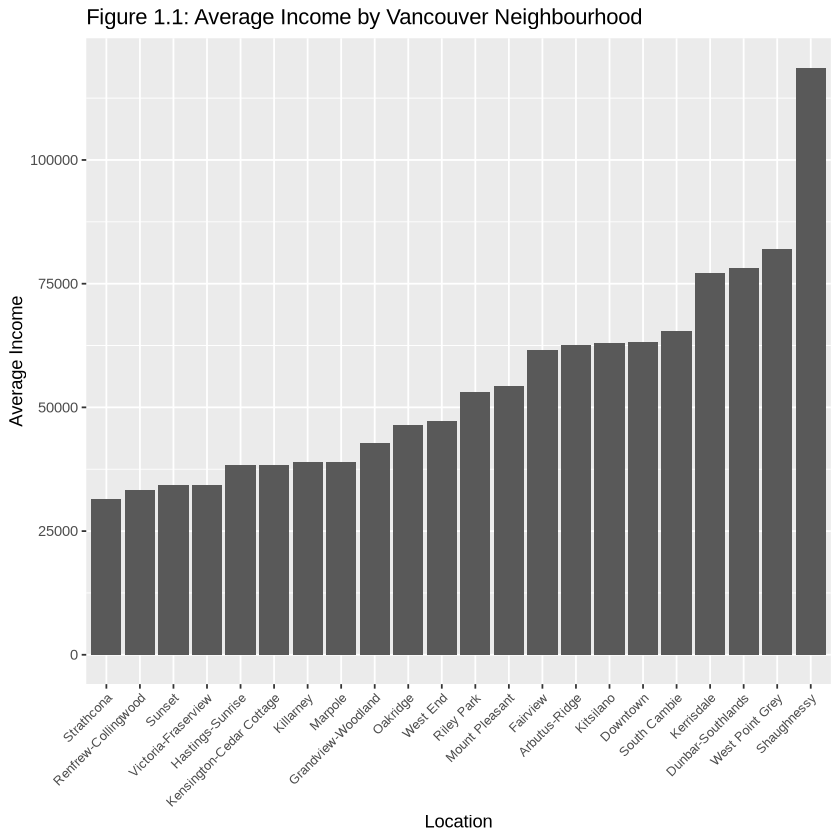

In [4]:
income_plot <- income |>
    ggplot(aes(x = reorder(neighbourhood_name, +mean_income), y = mean_income)) +
    geom_bar(stat = "identity") +
    labs(title="Figure 1.1: Average Income by Vancouver Neighbourhood",
         x="Location",
         y="Average Income") +
    theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
income_plot

From here, we note that Shaughnessy and Strathcona are the two extreme neighbourhoods, with Shaughnessy having the highest income and Strathcona having the lowest.<br>
However, it's important to note that Strathcona is a very small neighbourhood, with most of its land used towards housing Pacific Central station, Main Street-Science World station, and other buildings and factories. 
<center>
    <em>Figure 1.2: Map of the Strathcona region</em><br>
<img src="https://raw.githubusercontent.com/eshuaiii/stat-201-2023w1-group-50/016e841e05da82d17fa6d77a5e786f515439a126/Strathcona%20Region.png" width = 500px>
</center>

Instead, we hope to compare more residential neighbourhoods, to gain a better connection between the income of residents and the tree canopy in the region. Hence, we look to the neighbourhood with the next smallest income - Renfrew-Collingwood, and note that it is a more residential neighbourhood.

<center>
    <em>Figure 1.3: Map of the Renfrew-Collingwood region</em><br>
<img src="https://raw.githubusercontent.com/eshuaiii/stat-201-2023w1-group-50/main/Renfrew-Collingwood%20Region.png" width = 500px>
</center>

<h3 style="color:#039be5">Investigating our Trees Dataset </h3>

In [5]:
# --- Load tree data from the web  ---
# load data about all trees in Vancouver
street_trees <- read_delim(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/streettrees.csv"), delim=";")

# Preview the data
head(street_trees, 3)

Rows: 150695 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (15): STD_STREET, GENUS_NAME, SPECIES_NAME, CULTIVAR_NAME, COMMON_NAME,...
dbl   (5): TREE_ID, CIVIC_NUMBER, ON_STREET_BLOCK, HEIGHT_RANGE_ID, DIAMETER
date  (1): DATE_PLANTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,⋯,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,HEIGHT_RANGE,DIAMETER,CURB,DATE_PLANTED,Geom,geo_point_2d
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<date>,<chr>,<chr>
5791,3708,W 35TH AV,PSEUDOTSUGA,MENZIESII,NA,DOUGLAS FIR,N,N,L,⋯,W 35TH AV,DUNBAR-SOUTHLANDS,EVEN,9,90' - 100',50.00,Y,NA,"{""coordinates"": [-123.186767, 49.240027], ""type"": ""Point""}","49.240027, -123.186767"
5797,1101,E 7TH AV,ACER,PLATANOIDES,NA,NORWAY MAPLE,Y,N,N,⋯,E 7TH AV,MOUNT PLEASANT,ODD,2,20' - 30',8.25,Y,NA,"{""coordinates"": [-123.080395, 49.264375], ""type"": ""Point""}","49.264375, -123.080395"
5798,1101,E 7TH AV,ACER,PLATANOIDES,NA,NORWAY MAPLE,Y,N,N,⋯,E 7TH AV,MOUNT PLEASANT,ODD,3,30' - 40',12.25,Y,NA,"{""coordinates"": [-123.080284, 49.264372], ""type"": ""Point""}","49.264372, -123.080284"


<div style="text-align: center"><em>Table 1.3: Overview of <code>street_trees</code> dataset</em></div>

Let's start by cleaning up our data to select only our required columns: the tree's neighbourhood and its diameter, as well as some extra information (its ID and common name). We'll also filter for trees in the Renfrew-Collingwood and Shaugnessy regions, before finally cleaning up the column names to make things more readable.

In [6]:
# Remove unnecessary columns and remove any data points from street_trees that have an NA value for diameter
street_trees_cleaned <- street_trees |>
    select(TREE_ID, COMMON_NAME, NEIGHBOURHOOD_NAME, DIAMETER) |>
    filter(NEIGHBOURHOOD_NAME %in% c("RENFREW-COLLINGWOOD", "SHAUGHNESSY")) |>
    filter(!is.na(DIAMETER))

# Also tidy up column names
names(street_trees_cleaned) <- tolower(names(street_trees_cleaned))
street_trees_cleaned$neighbourhood_name[street_trees_cleaned$neighbourhood_name == "RENFREW-COLLINGWOOD"]<- "Renfrew-Collingwood"
street_trees_cleaned$neighbourhood_name[street_trees_cleaned$neighbourhood_name == "SHAUGHNESSY"]<- "Shaughnessy"

head(street_trees_cleaned)

tree_id,common_name,neighbourhood_name,diameter
<dbl>,<chr>,<chr>,<dbl>
12347,AKEBONO FLOWERING CHERRY,Renfrew-Collingwood,3.00
120762,PISSARD PLUM,Renfrew-Collingwood,20.00
120763,KWANZAN FLOWERING CHERRY,Renfrew-Collingwood,14.00
120765,PISSARD PLUM,Renfrew-Collingwood,18.00
120775,PISSARD PLUM,Renfrew-Collingwood,14.00
120787,PISSARD PLUM,Renfrew-Collingwood,18.75


*Table 1.4: A portion of the cleaned trees dataset containing the columns of interest in the Renfrew-Collingwood and Shaughnessy neighbourhoods, `street_trees_cleaned`*

Now that we have our data, let's explore what we have. Let's plot out our sample distribution for each neighbourhood:

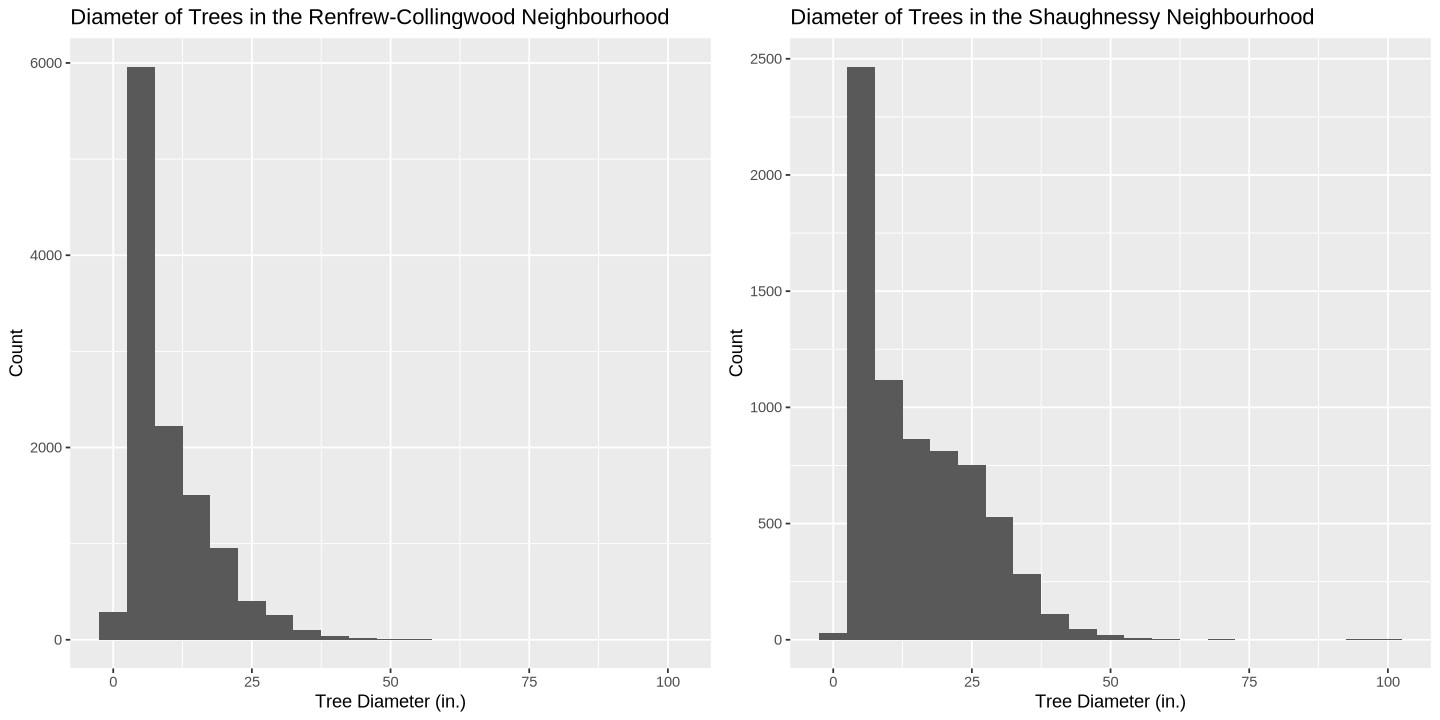

In [7]:
# Plot the tree diameters in Renfrew-Collingwood
RC_diameter_plot <- street_trees_cleaned |>
    filter(neighbourhood_name == "Renfrew-Collingwood") |>
    ggplot(aes(x = diameter)) +
        geom_histogram(binwidth = 5) +
        labs(x = "Tree Diameter (in.)", y = "Count", title = "Diameter of Trees in the Renfrew-Collingwood Neighbourhood")

# Plot the tree diameters in Shaughnessy
S_diameter_plot <- street_trees_cleaned |>
    filter(neighbourhood_name == "Shaughnessy") |>
    ggplot(aes(x = diameter)) +
        geom_histogram(binwidth = 5) +
        labs(x = "Tree Diameter (in.)", y = "Count", title = "Diameter of Trees in the Shaughnessy Neighbourhood")

options(repr.plot.width = 12, repr.plot.height = 6)
grid.arrange(RC_diameter_plot, S_diameter_plot, ncol = 2)

<div style="text-align: center"><em>Figure 1.4: Diameter of Trees in the Renfrew-Collingwood and Shaughnessy Neighbourhoods</em></div>

!!! ANALYSIS
The two distributions for two neighborhood are all right-skewed. Most of their tree diameters are centered between 0 to 25. We need to compare bootstrapping and CLT to see which one is more appropirate under our hypothesis testing, so now let's check it!

And also create some boxplots to visualize the spread of the data:

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


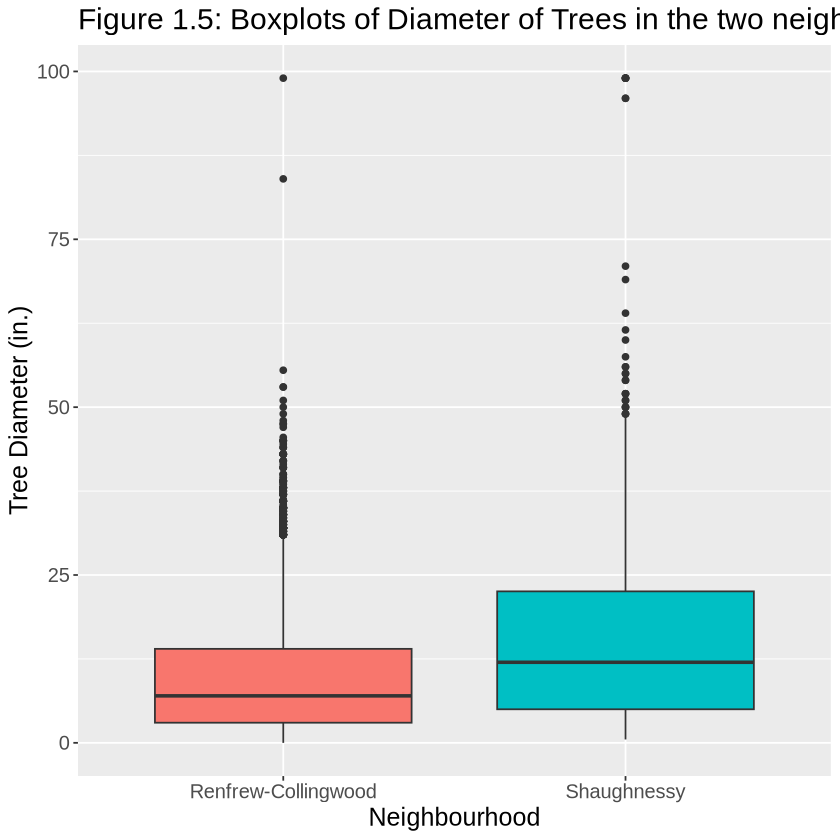

In [8]:
# create boxplots for the data
treediameter_boxplots <-
    street_trees_cleaned %>% 
    ggplot() +
    geom_boxplot(aes(neighbourhood_name, diameter, fill = neighbourhood_name)) +
    theme(text = element_text(size = 15)) +
    labs(x = "Neighbourhood", y = "Tree Diameter (in.)", title = "Figure 1.5: Boxplots of Diameter of Trees in the two neighbourhoods") +
    guides(fill = FALSE)

options(repr.plot.width = 7, repr.plot.height = 7)
treediameter_boxplots

The Renfrew-Collingwood has a lower mean and a narrower quantile range, whereas the mean for Shaughnessy is larger, and its upper quantile is much higher than the one for Renfrew-Collingwood.

And finally, let's summarize the key details of the data into a table:

In [9]:
#summarize the two samples' means and variances in a table
RC_Shaughnessy_summary <- 
     street_trees_cleaned %>% 
     group_by(neighbourhood_name) %>% 
     summarise(sample_mean = mean(diameter), 
               sample_sd = sd(diameter),
               sample_var = var(diameter), 
               n = n())
RC_Shaughnessy_summary

neighbourhood_name,sample_mean,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Renfrew-Collingwood,9.504639,7.859657,61.77422,11760
Shaughnessy,14.811877,11.070293,122.55139,7048


*Table 1.5: Summary of key details from `street_trees_cleaned`*

<h2 style="color:#008a05">Investigating Difference of Means of Diameter</h2>

We will now investigate our difference of means between the tree diameters of the two regions. As our sample size is quite large, we plan on using CLT and a normal distribution to generate our confidence intervals instead of bootstrapping to save resources.

Let's begin by first visualizing our distribution of the difference of means of tree diameters using bootstrapping:

In [10]:
# Set our seed once
set.seed(50)

In [11]:
bootstrap_dist <- street_trees_cleaned |>
    specify(diameter ~ neighbourhood_name) |>
    generate(reps = 200, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("Shaughnessy", "Renfrew-Collingwood"))

bootstrap_dist

replicate,stat
<int>,<dbl>
1,5.439947
2,5.501505
3,5.404722
4,5.198260
⋮,⋮
197,5.493644
198,5.375193
199,5.161315
200,5.526141


*Table 2.1: bootstrapped summary for difference in means from street_trees_cleaned*

In [12]:
bootstrap_ci2 <- bootstrap_dist |>
    get_ci(level = 0.95, type = "percentile")
bootstrap_ci2

lower_ci,upper_ci
<dbl>,<dbl>
5.028967,5.560462


*Table 2.2: confidence interval for bootstrap distribution*

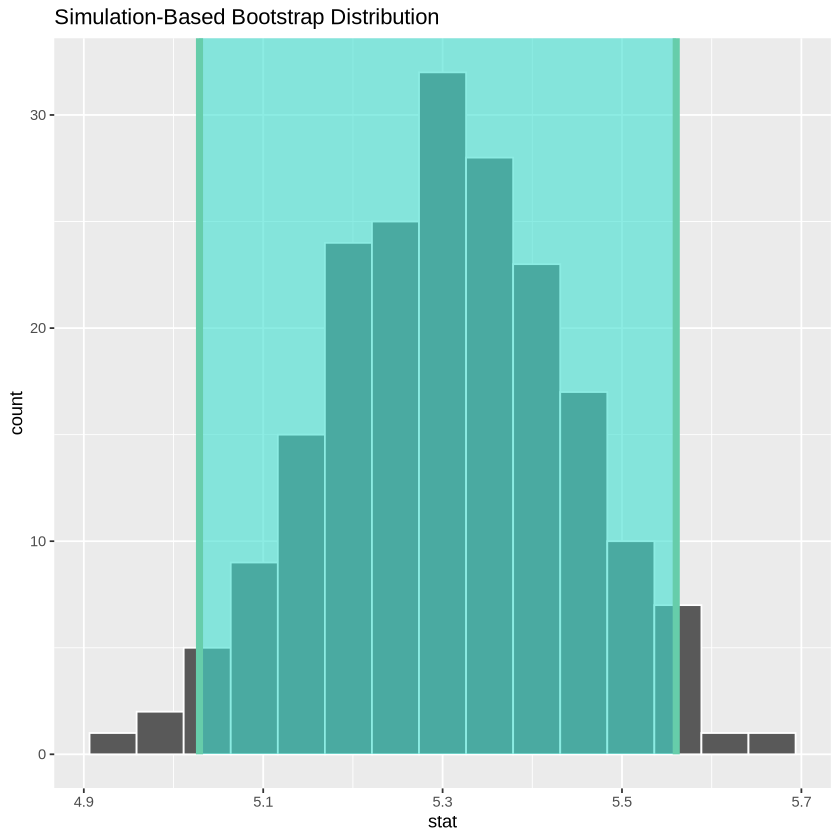

In [13]:
bootstrap_graph <- bootstrap_dist |>
    visualize() +
    shade_confidence_interval(endpoints = bootstrap_ci2)

bootstrap_graph

*Graph 2.1: visualization for bootstrapping*

Now, we will use the `infer` workflow to illustrate our null model.

In [14]:
# null model

null_model <- street_trees_cleaned %>%
  specify(diameter ~ neighbourhood_name) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 200, type = "permute") %>%
  calculate(stat = "diff in means", order = c("Shaughnessy", "Renfrew-Collingwood"))

head(null_model)

replicate,stat
<int>,<dbl>
1,-0.02005368
2,0.15241552
3,-0.01225904
4,-0.03234357
5,-0.12990480
6,-0.02822501


*Table 2.3: null model for difference in means*

Let's calculate the observed test statistic as the difference in the mean diameter between the two neighbourhoods:

In [15]:
# Calculate test statistic
obs_mean_diff <- RC_Shaughnessy_summary$sample_mean[2] - RC_Shaughnessy_summary$sample_mean[1]
obs_mean_diff

[1] 5.307238

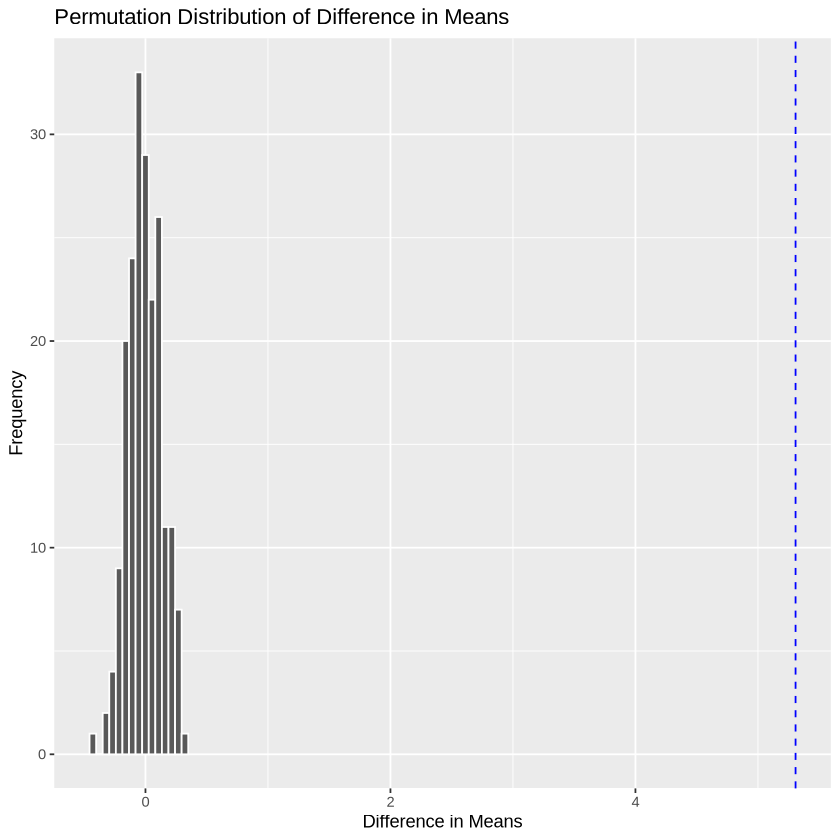

In [16]:
# plot out the null model
null_distribution <- null_model %>%
  visualize() +
  geom_vline(aes(xintercept = obs_mean_diff), color = "blue", linetype = "dashed") +
  ggtitle("Permutation Distribution of Difference in Means") +
  xlab("Difference in Means") +
  ylab("Frequency")

null_distribution

*Graph 2.2: the null distribution and the position of our test statistics*

We notice that our null model is very, very far away from our observed test statistic! Let's calculate our confidence interval using CLT and conduct our hypothesis test to validate this.

From Figure 1.4, we note that the two distributions of both neighbourhoods are heavily right-skewed. Hence, we must ensure that our sample size is large enough in order for the distribution to converge into a normal distribution. Yet, our sample is all of the tree diameters surveyed in 2016 in the city of Vancouver, which means that if we were to use our entire sample, we would likely be breaking the independence condition as we have data that closely resembles the population.

Hence, to combat this, we will take a smaller sample size (10%) to calculate our confidence interval and p-value. This will result in an increased amount of error that we will address in our Discussion.

In [17]:
trees_sampled <- sample_frac(street_trees_cleaned, 0.1)

sample_summary <- 
     trees_sampled %>% 
     group_by(neighbourhood_name) %>% 
     summarise(sample_mean = mean(diameter), 
               sample_sd = sd(diameter),
               sample_var = var(diameter), 
               n = n())
sample_summary

neighbourhood_name,sample_mean,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Renfrew-Collingwood,9.299358,7.740713,59.91864,1169
Shaughnessy,14.091784,10.391405,107.98129,712


*Table 2.4: Create a new sample and summarize it*

The sampling distributions for two neighborhood are all normal distribution, which reach the precondition for CLT.

In [18]:
# Calculate the standard error
se_rc <- sample_summary$sample_var[1] / sample_summary$n[1]
se_sh <- sample_summary$sample_var[2] / sample_summary$n[2]

se <- sqrt(se_rc + se_sh)

# Find confidence interval
means_diff_means_ci <- 
    tibble(
        lower_ci = sample_summary$sample_mean[2] - sample_summary$sample_mean[1] - qnorm(0.975, mean = 0, sd = 1) * se,
        upper_ci = sample_summary$sample_mean[2] - sample_summary$sample_mean[1] + qnorm(0.975, mean = 0, sd = 1) * se,
    )

means_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
3.909537,5.675313


*Table 2.5: confidence interval under new sample*

In [19]:
# !!! This is using the entire sample.
# Calculate the mean and standard deviation for each neighborhood
trees_data <- street_trees_cleaned %>%
  group_by(neighbourhood_name) %>%
  summarise(
    count = n(),
    mean = mean(diameter),
    sd = sd(diameter)) %>%
 ungroup()



# Calculate the standard error for each group
trees_data <- trees_data %>%
  mutate(se = sd / sqrt(count))

# Get the statistics for each neighborhood
renfrew <- trees_data %>% filter(neighbourhood_name == "Renfrew-Collingwood")
shaughnessy <- trees_data %>% filter(neighbourhood_name == "Shaughnessy")

# Calculate the standard error for the difference in means
se_diff <- sqrt(renfrew$se^2 + shaughnessy$se^2)

# Calculate the observed difference in means
obs_diff <- shaughnessy$mean - renfrew$mean

# Determine the critical value for your chosen confidence level (e.g., 95% confidence)
z <- qnorm(1 - 0.05/2)

# Calculate the margin of error
margin_of_error <- z * se_diff

# Calculate the confidence interval
ci_lower <- obs_diff - margin_of_error
ci_upper <- obs_diff + margin_of_error

# Print the confidence interval
ci <- c(ci_lower, ci_upper)
print(ci)




[1] 5.012323 5.602152


This is the confidence interval built by CLT. 

Both preconditions of bootstrapping and CLT are reached. It seems that the confidence intervals built by CLT and bootstrapping have similar range. In this way, both of these methods can be used to test our hypothesis.

Although these two area samples' tree diameter distributions are not normal, the sample sizes are large enough to apply Central Limit Theorem to compute two sample t test. In addition, the boostrapping method fits in our first hypothesis. We can directly generate the p value by computing null distribution.

The graph shows that the effect size is really large. The true difference in means between two samples is so far away from the null model. Now, Let's use two sample t test to generate p value and see if the null hypothesis can be rejected.

In [20]:
shaughnessy <- street_trees_cleaned |>
    filter(neighbourhood_name == "Shaughnessy") 

rc <- street_trees_cleaned |>
    filter(neighbourhood_name == "Renfrew-Collingwood") 

t_test <- tidy(t.test(x = shaughnessy$diameter, y = rc$diameter, alternative = "greater"))

p_value <- t_test |>
    pull(p.value)

t_test
p_value

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.307238,14.81188,9.504639,35.27123,5.772436e-259,11328.32,5.059717,Inf,Welch Two Sample t-test,greater


[1] 5.772436e-259

*Table 2.6: the result summary for two sample t test*

We can illustrate this t-test result using a t-distribution graph.

In [21]:
# to get df
# Sample variances for both groups
rc_var <- RC_Shaughnessy_summary$sample_var[1]
sh_var <- RC_Shaughnessy_summary$sample_var[2]


# Sample sizes for both groups
nrc <- street_trees_cleaned %>% filter(neighbourhood_name == "Renfrew-Collingwood") %>% nrow()
nsh <- street_trees_cleaned %>% filter(neighbourhood_name == "Shaughnessy") %>% nrow()


# Getting degrees of freedom
# Since there are outliers in each sample, 
# it is better to use Welch's t-test to get df, which is less sensitive towards outliers.
df <- (rc_var / nrc + sh_var/ nsh)^2 /
      (((rc_var / nrc)^2 / (nrc - 1)) + ((sh_var / nsh)^2 / (nsh - 1)))

df


[1] 11328.32

In [22]:
#Compute Test statistics
standard_error <-  sqrt(RC_Shaughnessy_summary$sample_var[2]/RC_Shaughnessy_summary$n[2]+RC_Shaughnessy_summary$sample_var[1]/RC_Shaughnessy_summary$n[1])
dif_mean <- RC_Shaughnessy_summary$sample_mean[2] - RC_Shaughnessy_summary$sample_mean[1]
t_stat <- dif_mean/standard_error
t_stat

[1] 35.27123

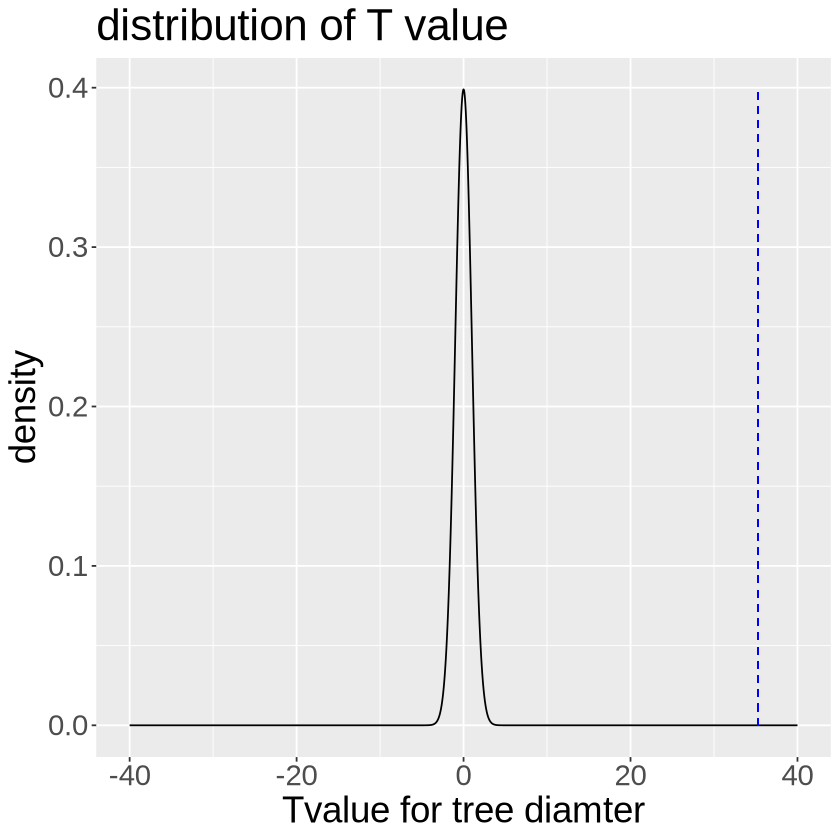

In [23]:
#plot out the t distribution model
t_model<-
    tibble(t=seq(-40, 40, 0.02), density = dt(t, df)) %>% 
    ggplot() + geom_line(aes(t, density)) +
    geom_segment(aes(x = t_stat, 
                     y = 0, 
                     xend= t_stat,
                     yend = dt(t, df)),
                 colour="blue", linetype = 'dashed') + 
    xlab("Tvalue for tree diamter") +
    ggtitle("distribution of T value")+    
    theme(text = element_text(size=22)) 
t_model

*Graph 2.3: the t distribution under df*

The t value is large, which locates at the edge of t distribution under the df we calculated under  Welch's t-test.

Since our p.value is less than our defined $\alpha = 0.05$, we can reject the null hypothesis and conclude that the mean diameter of trees in the Shaughnessy neighbourhood is different than the mean diameter of trees in the Renfrew-Collingwood neighbourhood.

## Necessary?

In [ ]:
# for renfrew
sample_rf_plot <- 
    street_trees_cleaned %>% 
    filter(neighbourhood_name == "Renfrew-Collingwood") %>%
    rep_sample_n(reps = 2000, size = 500, replace = FALSE) %>% 
     group_by(replicate) %>% 
    summarise(d = mean(diameter))
    # ggplot(aes(x = d))+
    # geom_histogram(binwidth = 0.1)+
    # ggtitle("sampling distribution for renfrew-Collingwood")
           
sample_rf_plot

#for shaughnessy
sample_sh_plot <- 
    street_trees_cleaned %>% 
    filter(neighbourhood_name == "Shaughnessy") %>%
    rep_sample_n(reps = 2000, size = 500, replace = FALSE) %>% 
    group_by(replicate) %>% 
    summarise(d = mean(diameter))
    # ggplot(aes(x = d))+
    # geom_histogram(binwidth = 0.1)+
    # ggtitle("sampling distribution for Shaughnessy")

sample_sh_plot


# final_plot <- bind_rows(
#   sample_rf_plot %>% mutate(neighbourhood = "Renfrew-Collingwood"),
#   sample_sh_plot %>% mutate(neighbourhood = "Shaughnessy")) %>%
#   group_by(replicate) %>%
#   summarize(
#     mean_diff = d[neighbourhood == "Shaughnessy"] - 
#       d[neighbourhood == "Renfrew-Collingwood"])

# test <- final_plot |>
#     get_ci(level = 0.95, type = "percentile")

# test

# final_plot <- final_plot |>
# ggplot(aes(x = mean_diff)) +
# geom_histogram(binwidth = 0.1)

# final_plot

Graph 1.4

Now Let's generate the null model for the difference in mean of tree diameter in two neighborhood.

Graph 2.2

In [ ]:
# Calculate the p-value
p_valueone <- null_model %>%
  get_p_value(obs_stat = dif_mean, direction = "right")
p_valueone

In [ ]:
#calculating p value
p_value <- pt(t_stat, df, lower.tail=FALSE)
p_value

The p value under this test statistics is super small. 

## IGNORE THIS (bootstrap attempt)

In [ ]:
# Bootstrap for Renfrew-Collingwood
RenfrewCollingwoodbs <- street_trees_cleaned %>% 
  filter(neighbourhood_name == "Renfrew-Collingwood") %>%  
  specify(response = diameter) %>% 
  generate(type = "bootstrap", reps = 50) %>% 
  calculate(stat = "mean")

# Bootstrap for Shaughnessy
Shaughnessybs <- street_trees_cleaned %>% 
  filter(neighbourhood_name == "Shaughnessy") %>%  
  specify(response = diameter) %>% 
  generate(type = "bootstrap", reps = 50) %>% 
  calculate(stat = "mean")


combined_bs <- 
  RenfrewCollingwoodbs %>% mutate(mean_diff = Shaughnessybs$stat - stat)

# Calculate the Confidence Interval for 95% significant level
CI <- combined_bs %>% get_confidence_interval(level = 0.95, type = "percentile")

CI
# Visualize the Confidence Interval
ci_plot_bs <- combined_bs  %>% ggplot(aes(x = mean_diff)) + geom_histogram(binwidth = 0.2) +
    geom_vline(xintercept = CI[[1]]) +
    geom_vline(xintercept = CI[[2]])

ci_plot_bs


Graph 1.3

<h2 style="color:#008a05">Investigating Difference of Standard Deviations of Diameter</h2>

For Part 2 of our hypothesis (exploring standard deviations), we will conduct a similar test to the difference of means but employ a bootstrapping method instead.

In [24]:
#summarize the two samples' means and variances in a table
RC_Shaughnessy_summarytwo <- 
     street_trees_cleaned %>% 
     group_by(neighbourhood_name) %>% 
     summarise(sample_sd = sd(diameter),
              n = n())
RC_Shaughnessy_summarytwo

neighbourhood_name,sample_sd,n
<chr>,<dbl>,<int>
Renfrew-Collingwood,7.859657,11760
Shaughnessy,11.070293,7048


*Table 3.1: the standard deviation for two neighbourhood*

In [32]:
# filter out Renfrew-Collingwood and Shaughnessy respectively
rc <- street_trees_cleaned %>%
  filter(neighbourhood_name == "Renfrew-Collingwood") %>%
  select(diameter)

sh <- street_trees_cleaned %>%
  filter(neighbourhood_name == "Shaughnessy") %>%
  select(diameter)

# Calculate the observed difference in standard deviations
observed_diff <- sd(sh$diameter) - sd(rc$diameter)
observed_diff

# modify to use the infer workflow so visualize + confidence intervals + p value is easier.
bs_rcsd <- rc %>% 
     rep_sample_n(size = RC_Shaughnessy_summarytwo$n[1], reps = 300, replace = TRUE) %>% 
     group_by(replicate) %>% 
     summarise(sd_diameter = sd(diameter))

bs_shsd <- sh %>% 
     rep_sample_n(size = RC_Shaughnessy_summarytwo$n[2], reps = 300, replace = TRUE) %>% 
     group_by(replicate) %>% 
     summarise(sd_diameter = sd(diameter))

combined_rcsh <- bs_shsd %>%
    mutate (sd_diff = sd_diameter - bs_rcsd$sd_diameter)%>%
    select(-sd_diameter)

combined_rcsh

[1] 3.210636

replicate,sd_diff
<int>,<dbl>
1,3.068702
2,3.370973
3,3.126352
4,3.329375
⋮,⋮
297,3.128498
298,3.059203
299,3.183040
300,3.359075


*Table 3.2: the difference in standard deviation for two neighbourhood*

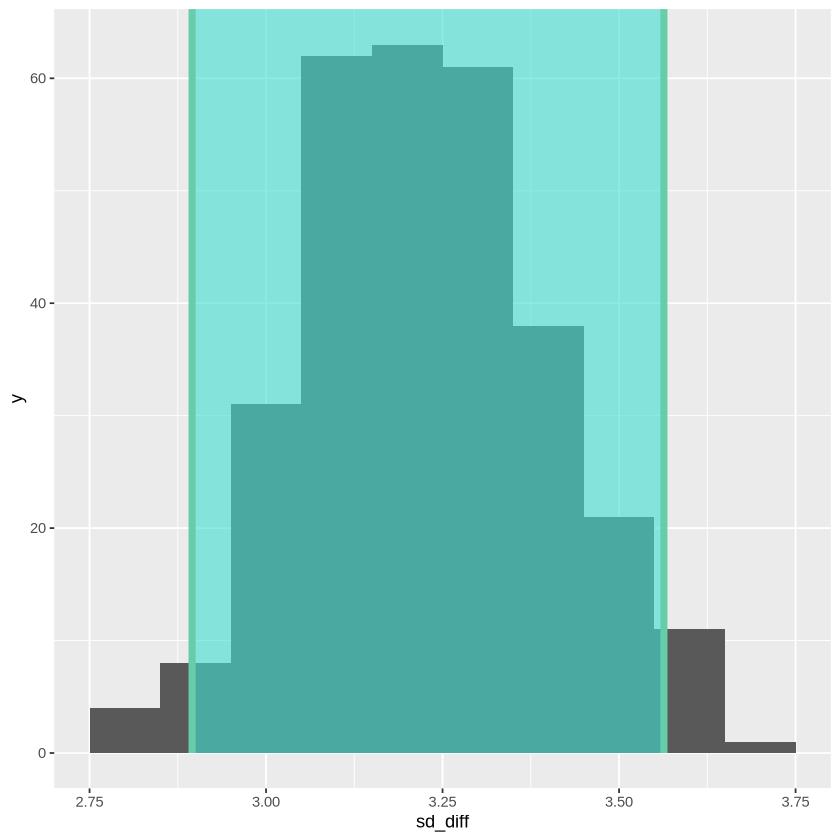

In [38]:
# Visualize the Bootstrapped Distribution
sd_ci2 <- combined_rcsh |>
    get_ci(level = 0.95, type = "percentile")

bs_plot_sd <- combined_rcsh %>%
    ggplot(aes(x = sd_diff)) +
    geom_histogram(binwidth = 0.1) +
    shade_confidence_interval(endpoints = sd_ci2)
bs_plot_sd

*Graph 3.1: the visualization for the bootstrapped distribution and the confidence interval*

Now that we have our sampling distribution, we should now recentre our data to reflect our null hypothesis, creating the null model.

Recall that the null hypothesis is:<br>
$H_0: \sigma_s - \sigma_r = 0$

Hence, we need to recentre all of our data by subtracting the observed difference in standard deviation value.

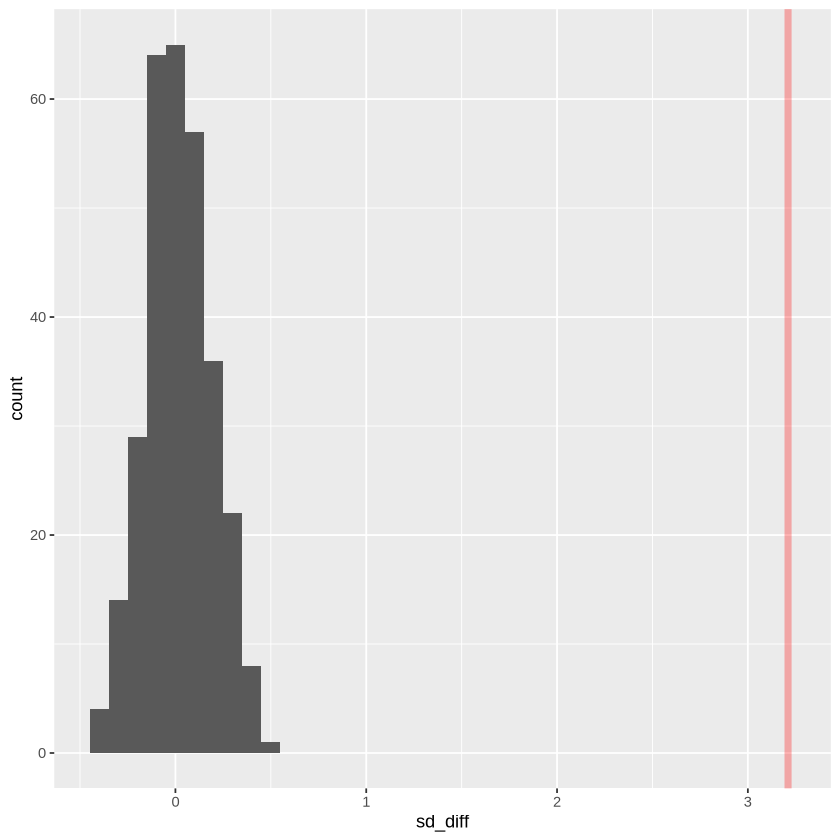

In [40]:
null_model_sd <- combined_rcsh |>
    mutate(sd_diff = sd_diff + (0 - observed_diff))

# Visualize the Bootstrapped Distribution
bs_plot_sd <- null_model_sd %>%
    ggplot(aes(x = sd_diff)) +
    geom_histogram(binwidth = 0.1) +
    geom_vline(xintercept = observed_diff, color = "red", alpha=.3, lwd=2)

bs_plot_sd

*Graph 3.2: the null model and the real standard deviation difference*

In [36]:
# Calculate the p-value
p_value <- null_model_sd %>%
  get_p_value(obs_stat = observed_diff, direction = "both")

p_value 

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


*Tale 3.3: p value*

In [ ]:
# visualize null model
# draw confidence interval?
# idek what next

Graph 2.4

<h2 style="color:#008a05">Results and Discussion</h2>

YAYEET

<h2 style="color:#008a05">References</h2>

Baró, F., Calderón-Argelich, A., Langemeyer, J., & Connolly, J. J. (2019). Under one canopy? Assessing the distributional environmental justice implications of street tree benefits in Barcelona. Environmental Science & Policy, 102, 54-64. https://www.sciencedirect.com/science/article/pii/S0169204620314766

Kiani, B., Thierry, B., Fuller, D., Firth, C., Winters, M., & Kestens, Y. (2023). Gentrification, neighborhood socioeconomic factors and urban vegetation inequities: A study of greenspace and tree canopy increases in Montreal, Canada. Landscape and Urban Planning, 240, 104871. https://doi.org/10.1016/j.landurbplan.2023.104871

McDonald, R. I., Biswas, T., Sachar, C., Housman, I., Boucher, T. M., Balk, D., Nowak, D., Spotswood, E., Stanley, C. K., & Leyk, S. (2021). The tree cover and temperature disparity in US urbanized areas: Quantifying the association with income across 5,723 communities. PLOS ONE, 16(4), e0249715. https://doi.org/10.1371/journal.pone.0249715

<br><br><br>
*Thank you! - Group 50*